In [1]:
import pandas as pd
import json

In [2]:
data = pd.read_csv("finances.csv", parse_dates=True)
data[["Date"]] = data[["Date"]].fillna(method="ffill")
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Item,Price,Card,Notes,TTD
0,2022-08-08,Compass,20.00,ScD,NaN,370.36
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN


In [3]:
with open('categories.json', 'r') as f:
    categories = json.load(f)

all_merchants = {i for j in categories.values() for i in j}
print(list(categories.keys()))

['Eating out', 'Groceries', 'Entertainment', 'Transport', 'Misc.']


In [4]:
flag_merchant = False
for i in data["Item"].unique():
    if i not in all_merchants:
        flag_merchant = True
        print(f"{i} is a new merchant")

if not flag_merchant:
    print("All merchants accounted for")

All merchants accounted for


In [5]:
EATING_OUT_BUDGET = 600
GROCERIES_BUDGET = 600
TRANSPORT_BUDGET = 100
ENTERTAINMENT_BUDGET = 100
MISC_BUDGET = 100
CATEGORY_BUDGETS = {
    "Eating out": EATING_OUT_BUDGET,
    "Groceries": GROCERIES_BUDGET,
    "Transport": TRANSPORT_BUDGET,
    "Entertainment": ENTERTAINMENT_BUDGET,
    "Misc.": MISC_BUDGET
}

In [6]:
data_categories = []
for i in data["Item"]:
    for j in list(categories.keys()):
        if i in categories[j]:
            data_categories.append(j)
            break
data["Category"] = data_categories
data

,Date,Item,Price,Card,Notes,TTD,Category
0,2022-08-08,Compass,20.00,ScD,NaN,370.36,Transport
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN,Misc.
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN,Eating out
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN,Entertainment
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN,Groceries
5,2022-08-09,McDonalds,3.14,TDR,NaN,NaN,Eating out
6,2022-08-09,Ajisai sushi,27.05,TDR,NaN,NaN,Eating out
7,2022-08-10,Compass,3.10,TDR,NaN,NaN,Transport
8,2022-08-11,Big way hotpot,5.74,Mogo,NaN,NaN,Eating out
9,2022-08-11,Hon sushi,8.49,Mogo,NaN,NaN,Eating out


In [7]:
per_category = (
    data.groupby("Category")["Price"].sum()
    .reset_index().rename(columns={"Price": "Total"})
)
per_category

,Category,Total
0,Eating out,145.66
1,Entertainment,56.19
2,Groceries,85.28
3,Misc.,40.13
4,Transport,43.10


In [8]:
category_pies = []
category_text = []
for _, i in per_category.iterrows():
    c = i["Category"]
    t = round(i["Total"], 2)
    b = CATEGORY_BUDGETS[c]
    perc = int(100 * t / b)
    category_pies.append(c)
    text = f"${t} spent out of ${b}"
    category_text.append(text)

In [13]:
data["Month"] = data["Date"].dt.month_name()
data["Year"] = data["Date"].dt.year
data.head()

,Date,Item,Price,Card,Notes,TTD,Category,Month,Year
0,2022-08-08,Compass,20.00,ScD,NaN,370.36,Transport,August,2022
1,2022-08-08,Evo,25.40,ScD,Harrison hot springs,NaN,Misc.,August,2022
2,2022-08-08,Snackshot,9.40,ScD,NaN,NaN,Eating out,August,2022
3,2022-08-08,Harrison Waterpark,45.00,ScD,NaN,NaN,Entertainment,August,2022
4,2022-08-08,Save on foods,85.28,TDR,NaN,NaN,Groceries,August,2022


In [37]:
data = pd.DataFrame({
    "Date": ["2022-07-08", "2022-08-08", "2022-08-08", "2022-09-08", "2023-08-08", "2023-09-08"],
    "Item": ["a", "a", "a", "a", "a", "a"],
    "Price": [1, 2, 3, 2, 10, 6],
    "Card": ["a", "a", "a", "a", "a", "a"],
    "Notes": ["a", "a", "a", "a", "a", "a"],
    "TTD": ["a", "a", "a", "a", "a", "a"],
    "Category": ["a", "a", "a", "a", "a", "a"]
})
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month_name()
data["Year"] = data["Date"].dt.year
data

,Date,Item,Price,Card,Notes,TTD,Category,Month,Year
0,2022-07-08,a,1,a,a,a,a,July,2022
1,2022-08-08,a,2,a,a,a,a,August,2022
2,2022-08-08,a,3,a,a,a,a,August,2022
3,2022-09-08,a,2,a,a,a,a,September,2022
4,2023-08-08,a,10,a,a,a,a,August,2023
5,2023-09-08,a,6,a,a,a,a,September,2023


In [40]:
per_period = (
    data.groupby(by=["Year", "Month"]).sum()
    .reset_index().sort_values(by=["Year", "Month"], ascending=True).tail(5)
)
per_period["Period"] = [
    f"{i} {j}" for i, j in zip(per_period['Month'], per_period['Year'])
]
per_period

,Year,Month,Price,Period
0,2022,August,5,August 2022
1,2022,July,1,July 2022
2,2022,September,2,September 2022
3,2023,August,10,August 2023
4,2023,September,6,September 2023


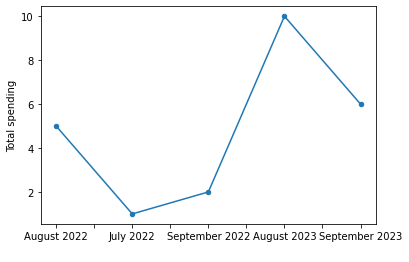

In [50]:
spending_timeline = per_period.plot.line(x="Period", y="Price", legend=False)
per_period.plot.scatter(x="Period", y="Price", legend=False, ax=spending_timeline)
spending_timeline.set_xlabel(" ")
spending_timeline.set_ylabel("Total spending")

spending_timeline.figure.savefig("spending-timeline.png")